In [423]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [424]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")
vueltas.drop(['nextPit'], axis = 1, inplace = True)
vueltas.drop(['makeStop'], axis = 1, inplace = True)

### Vamos a limpiarlo un poco mas...

In [425]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]
vueltas_test = vueltas_test[vueltas_test['Piloto'] == 'hamilton']


In [426]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)


In [427]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [428]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)

In [429]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,5])

In [430]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [431]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [432]:
model.compile(optimizer="adam", loss= "mse") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 10, 256)           281600    
                                                                 
 dropout_44 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_45 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 478,849
Trainable params: 478,849
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
43/43 [==============================] - 8s 83ms/step - loss: 0.0369 - val_loss: 0.0223
Epoch 2/15
43/43 [==============================] - 3s 67ms/step - loss: 0.0188 - val_loss: 0.0171
Epoch 3/15
43/43 [==============================] - 3s 72ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 4/15
43/43 [==============================] - 3s 75ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 5/15
43/43 [==============================] - 4s 83ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 6/15
43/43 [==============================] - 4s 85ms/step - loss: 0.0101 - val_loss: 0.0115
Epoch 7/15
43/43 [==============================] - 3s 69ms/step - loss: 0.0099 - val_loss: 0.0105
Epoch 8/15
43/43 [==============================] - 3s 77ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 9/15
43/43 [==============================] - 3s 76ms/step - loss: 0.0095 - val_loss: 0.0106
Epoch 10/15
43/43 [==============================] - 3s 68ms/step - loss: 0.0083 - val_loss: 0.0095
Epoch 11/

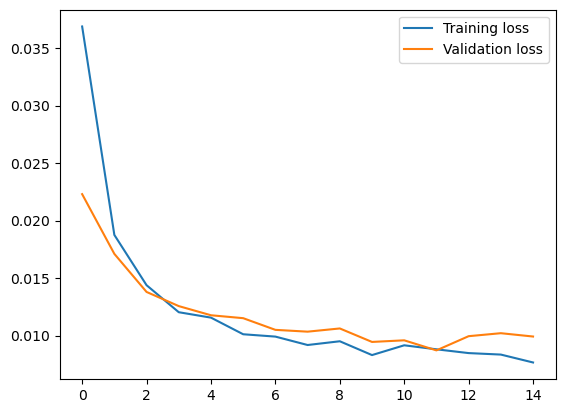

In [433]:
history = model.fit(trainX, trainY, epochs=15, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [434]:
y_real = testY.tolist()

In [435]:
y_pred = model.predict(testX)     

2/2 [==============================] - 0s 13ms/step


In [436]:
y_real

[[0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.3333333333333333],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [0.6666666666666667],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [437]:
y_pred

array([[0.2857807 ],
       [0.28696156],
       [0.2916136 ],
       [0.2961562 ],
       [0.2999421 ],
       [0.30376422],
       [0.30731747],
       [0.31147894],
       [0.31128964],
       [0.3136669 ],
       [0.31175864],
       [0.31059498],
       [0.45905575],
       [0.50239295],
       [0.52120703],
       [0.5271385 ],
       [0.5329658 ],
       [0.5372275 ],
       [0.54870504],
       [0.556442  ],
       [0.5658737 ],
       [0.57284707],
       [0.57535607],
       [0.5767723 ],
       [0.57225066],
       [0.5720513 ],
       [0.5714323 ],
       [0.56973034],
       [0.5678372 ],
       [0.563633  ],
       [0.5561814 ],
       [0.5528015 ],
       [0.5455608 ],
       [0.5352778 ],
       [0.5215356 ],
       [0.51012933],
       [0.5013671 ],
       [0.49115664],
       [0.5703397 ],
       [0.62458616],
       [0.66791946],
       [0.70375997],
       [0.7310623 ],
       [0.7539013 ],
       [0.77015555],
       [0.78933614],
       [0.8096974 ],
       [0.825

In [438]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [439]:
uniques

[[0.6666666666666667], [1.0], [0.3333333333333333]]

In [403]:
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [404]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [405]:
print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.5185185185185185


In [406]:
y_real_str = [str(value[0]) for value in y_real]
y_pred_normalized_str = [str(value) for value in y_pred_normalized]

In [407]:
clases = sorted([sublista[0] for sublista in uniques])

In [419]:
report = classification_report(y_real_str, y_pred_normalized_str, labels=clases, output_dict = True)
print(report)

{'0.0': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 2}, '0.3333333333333333': {'precision': 0.7368421052631579, 'recall': 0.9333333333333333, 'f1-score': 0.8235294117647058, 'support': 15}, '0.6666666666666667': {'precision': 0.375, 'recall': 0.75, 'f1-score': 0.5, 'support': 16}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21}, 'micro avg': {'precision': 0.5185185185185185, 'recall': 0.5185185185185185, 'f1-score': 0.5185185185185185, 'support': 54}, 'macro avg': {'precision': 0.4446271929824561, 'recall': 0.6708333333333334, 'f1-score': 0.5308823529411765, 'support': 54}, 'weighted avg': {'precision': 0.34048083170890187, 'recall': 0.5185185185185185, 'f1-score': 0.4065359477124183, 'support': 54}}


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [416]:
nombre_archivo = "pruebas_lstm_prediction_v1/max_verstappen/ejecucion_5.txt"

with open(nombre_archivo, "w") as archivo:
    print(report, file=archivo)

FileNotFoundError: [Errno 2] No such file or directory: 'pruebas_lstm_prediction_v1/max_verstappen/ejecucion_5.txt'

In [422]:
report['micro avg']['precision']

0.5185185185185185